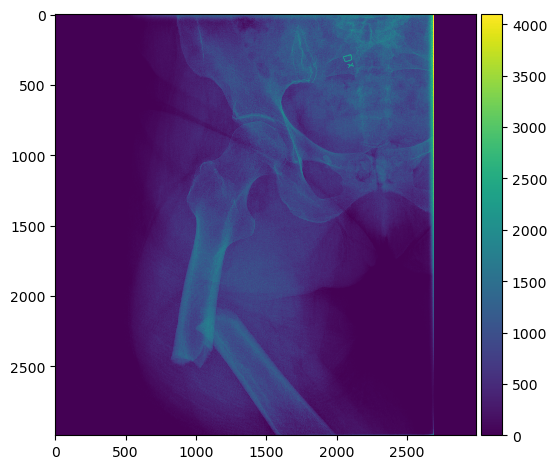

In [3]:
import skimage
import cv2
import matplotlib
from skimage import io
io.use_plugin('matplotlib')


#conda install cv2
#pip install opencv-python




from PIL import Image
from skimage.transform import rescale, resize, downscale_local_mean
import os



# PUT IN LOOP
img = cv2.imread("/local/data1/chash345/AFF_large/patient_12_AFF_class_1_modality_CR_scanoccasion_0_imagenumber_3.png", cv2.IMREAD_UNCHANGED)



width = 500
height = 500
dim = (width, height)



# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
io.imshow(img)
io.show()

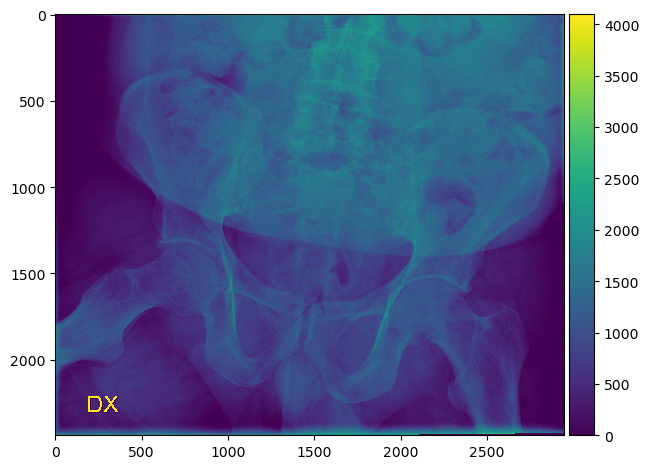

In [5]:
img = cv2.imread("../AFF_large/patient_1215_AFF_class_1_modality_CR_scanoccasion_0_imagenumber_1.png", cv2.IMREAD_UNCHANGED)
io.imshow(img)
io.show()

/home/chash345/.conda/envs/research/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


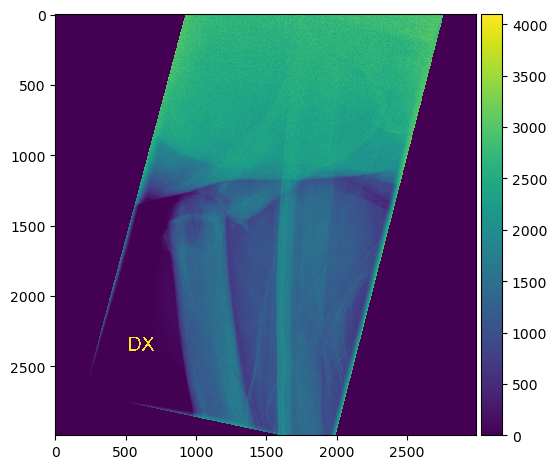

In [45]:
img = cv2.imread("../AFF_large/patient_1215_AFF_class_1_modality_CR_scanoccasion_0_imagenumber_2.png", cv2.IMREAD_UNCHANGED)
io.imshow(img)
io.show()

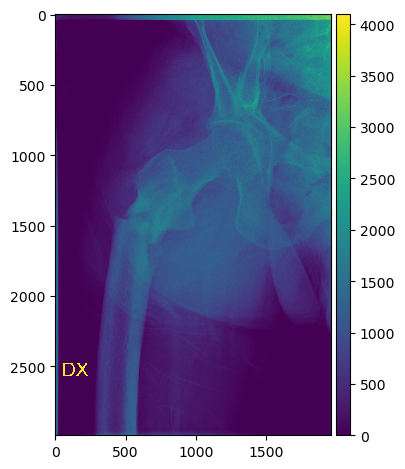

In [ ]:
img = cv2.imread("AFF_large/patient_1215_AFF_class_1_modality_CR_scanoccasion_0_imagenumber_3.png", cv2.IMREAD_UNCHANGED)
io.imshow(img)
io.show()

In [9]:
image_names = os.listdir('../AFF_large')

In [36]:
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
from pathlib import Path
import argparse
import numpy

# Argument parsing variable declared
#ap = argparse.ArgumentParser()

#ap.add_argument("-i", "--image",
#                required=True,
#                help="Path to folder")

#args = vars(ap.parse_args())

# Find all the images in the provided images folder
mypath = "images/AFF_large"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
images = numpy.empty(len(onlyfiles), dtype=object)
print("Total number of images: ", len(onlyfiles))

# Iterate through every image
# and resize all the images.



for n in range(0, (len(onlyfiles)+1)):

    path = join(mypath, onlyfiles[n])
    images[n] = cv2.imread(join(mypath, onlyfiles[n]),
                           cv2.IMREAD_UNCHANGED)

    # Load the image in img variable
    img = cv2.imread(path, 1)

  


   #get size
    height, width, channels = img.shape



   # Create a black image
    x = height if height > width else width
    y = height if height > width else width
    squared_image= np.zeros((x,y,3), np.uint8)
  
    squared_image[int((y-height)/2):int(y-(y-height)/2), int((x-width)/2):int(x-(x-width)/2)] = img



   # Save the image in Resize Folder
    cv2.imwrite(
      'resize/' + onlyfiles[n][0:-4] + '_resized.jpg', squared_image)
    
    if(n%500 == 0): print(f'{n} images resized successfully')



Total number of images:  4335
0 images resized successfully
500 images resized successfully
1000 images resized successfully
1500 images resized successfully
2000 images resized successfully
2500 images resized successfully
3000 images resized successfully
3500 images resized successfully


In [10]:
class_dict ={'control':[], 'aff':[]}
for i in image_names:
    if 'CONTROL' in i.split('_'):
        class_dict['control'].append(i)
    else:
        class_dict['aff'].append(i)
    continue

In [11]:
len(class_dict['aff'])

868

In [12]:
len(class_dict['control'])

3467

In [14]:
class_dict['control'].sort()


In [15]:
class_dict['aff'].sort()


In [27]:
train_control_indexlist = class_dict['control'][:(int(len(class_dict['control']) * .6))]

In [69]:
train_aff_indexlist = class_dict['aff'][:(int(len(class_dict['aff']) * .6))]

In [70]:
len(train_aff_indexlist)

520

In [44]:
len(train_control_indexlist)

2080

In [38]:
valid_control_indexlist = class_dict['control'][len(train_control_indexlist):2775]

In [71]:
valid_aff_indexlist = class_dict['aff'][len(train_aff_indexlist):695]

In [72]:
len(valid_aff_indexlist)

175

In [41]:
len(valid_control_indexlist)

695

In [42]:
test_control_indexlist =  class_dict['control'][2776:]

In [73]:
test_aff_indexlist =  class_dict['aff'][695:]

In [74]:
len(test_aff_indexlist)

173

In [43]:
len(test_control_indexlist)

691

In [53]:
def filter_list(string, substr): 
    return [st for st in string if any(sub in st for sub in substr)]

In [75]:
valid_control_filtered_list= filter_list(image_names, valid_control_indexlist)

In [82]:
valid_aff_filtered_list= filter_list(image_names, valid_aff_indexlist)

In [83]:
test_control_filtered_list= filter_list(image_names, test_control_indexlist)

In [84]:
test_aff_filtered_list= filter_list(image_names, test_aff_indexlist)

In [79]:
len(train_aff_filtered_list)

520

In [77]:
import shutil
old_path = '../images/AFF_large/'
new_path = '../train/aff/'

In [ ]:
shutil.copy()

In [80]:
for filename in os.listdir(old_path):
    if filename in train_aff_filtered_list:
        old_loc = rf"{old_path}/{filename}"
        new_loc = rf"{new_path}/{filename}"
        shutil.copy(old_loc, new_loc)

In [81]:
len(os.listdir('../train/aff/'))

520